In [1]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### A simple example

In [2]:
# Matplotlib graphs your data on Figures (i.e., windows, Jupyter widgets, etc.), each of which can contain
#one or more Axes (i.e., an area where points can be specified in terms of x-y coordinates (or theta-r in a 
#polar plot, or x-y-z in a 3D plot, etc.). The most simple way of creating a figure with an axes is using 
#pyplot.subplots. We can then use Axes.plot to draw some data on the axes:

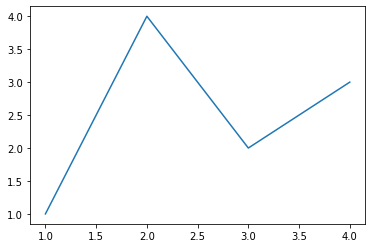

In [4]:
fig, ax = plt.subplots() # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]) # Plot some data on the axes.

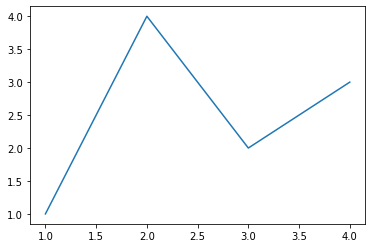

In [5]:
# Performs a plot on a "current" axes, creating an axes (and its parent figure) if they don't exist yet.
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Matplotlib plot.

### Parts of a Figure

In [6]:
# Figure
# The whole figure. The figure keeps track of all the child Axes, a smattering of 
#'special' artists (titles, figure legends, etc), and the canvas.
# A figure can contain any number of Axes, but will typically have at least one.

<Figure size 432x288 with 0 Axes>

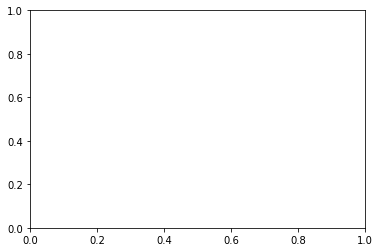

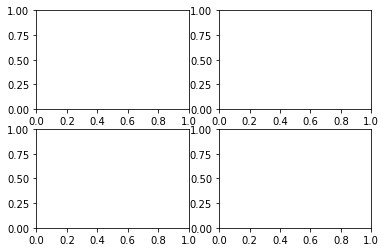

In [7]:
fig = plt.figure() # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# It's convenient to create the axes together with the figure, 
#but you can also add axes later on, allowing for more complex axes layouts

In [8]:
# Axes
# This is what you think of as 'a plot', it is the region of the image with the data space. 
# A given figure can contain many Axes, but a given Axes object can only be in one Figure.
# The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference 
#between Axes and Axis) which take care of the data limits (the data limits can also be controlled 
#via the axes.Axes.set_xlim() and axes.Axes.set_ylim() methods). 
# Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label
#set via set_ylabel()).

# The Axes class and its member functions are the primary entry point to working with the 
#OO(Object-Oriented) interface

In [9]:
# Axis
# These are the number-line-like objects. They take care of setting the graph limits and generating 
#the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). 
# The location of the ticks is determined by a Locator object and the ticklabel strings are formatted 
#by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the 
#tick locations and labels.

In [10]:
# Artist
# Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects). 
# This includes Text objects, Line2D objects, collections objects, Patch objects ... When the figure is rendered, 
#all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by 
#multiple Axes, or moved from one to another.

### Types of inputs to plotting functions

In [14]:
# All of plotting functions expect numpy.array or numpy.ma.masked_array as input. Classes that are 'array-like' 
#such as pandas data objects and numpy.matrix may or may not work as intended. 
#It is best to convert these to numpy.array objects prior to plotting.

#For example, to convert a pandas.DataFrame
a = pd.DataFrame(np.random.rand(4,5), columns = list('abcde'))
a_asarray = a.values
a_asarray

array([[0.5545043 , 0.31037978, 0.69708794, 0.78447845, 0.67609882],
       [0.20170923, 0.18803459, 0.45372943, 0.31608014, 0.13375441],
       [0.06793784, 0.69199285, 0.54088693, 0.54580159, 0.18408158],
       [0.1114157 , 0.03743066, 0.60134152, 0.54167264, 0.22013505]])

In [15]:
# and to convert a numpy.matrix
b = np.matrix([[1,2],[3,4]])
b_asarray = np.asarray(b)
b_asarray

array([[1, 2],
       [3, 4]])

### The object-oriented interface and the pyplot interface

In [16]:
# As noted above, there are essentially two ways to use Matplotlib:

# Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").
# Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting.
# So one can do (OO-style)

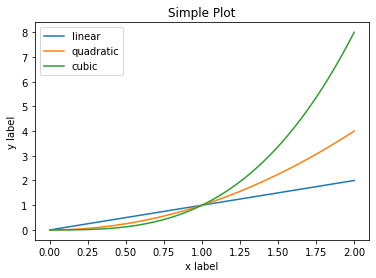

In [17]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

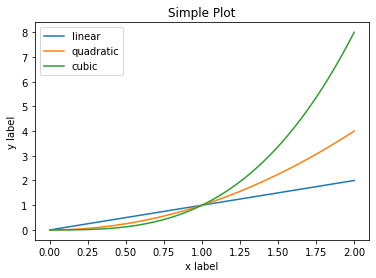

In [18]:
# or (pyplot-style)
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

In [19]:
# In general, we suggest to restrict pyplot to interactive plotting (e.g., in a Jupyter notebook), 
#and to prefer the OO-style for non-interactive plotting (in functions and scripts that are intended to 
#be reused as part of a larger project).

In [20]:
# Typically one finds oneself making the same plots over and over again, but with different data sets, 
#which leads to needing to write specialized functions to do the plotting. 
# The recommended function signature is something like:

def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

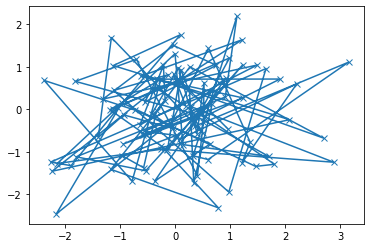

In [21]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

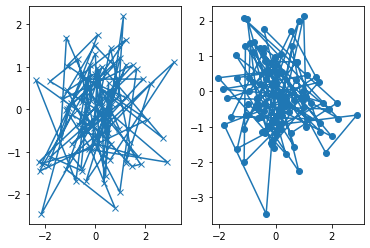

In [24]:
# or if you wanted to have 2 sub-plots:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

In [27]:
import matplotlib.pyplot as plt
plt.ion()
plt.ion()

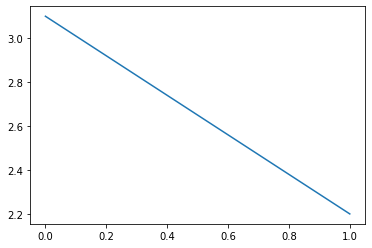

In [28]:
ax = plt.gca()
ax.plot([3.1, 2.2])

### Pyplot tutorial

In [29]:
# An introduction to the pyplot interface
# matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. 
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure,
#plots some lines in a plotting area, decorates the plot with labels, etc.

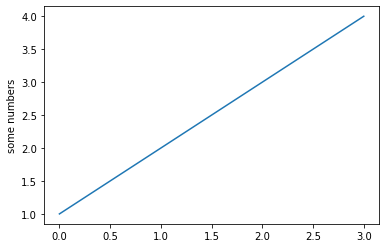

In [30]:
# Generating visualizations with pyplot is very quick:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

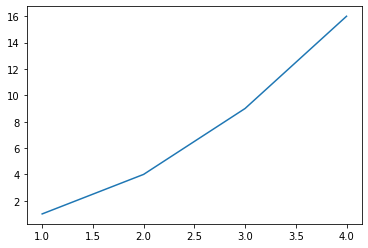

In [32]:
# plot() is a versatile command, and will take an arbitrary number of arguments. 
#For example, to plot x versus y, you can issue the command:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

### Formatting the style of your plot

In [33]:
# For every x, y pair of arguments, there is an optional third argument which is the format string that indicates
#the color and line type of the plot. 
# The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line 
#style string. 
# The default format string is 'b-', which is a solid blue line. For example, to plot the above with red circles, 
#you would issue

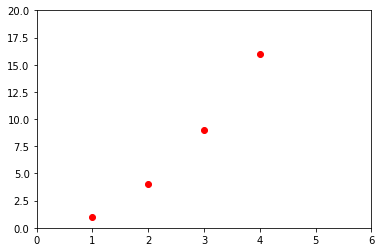

In [34]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

In [35]:
# If matplotlib were limited to working with lists, it would be fairly useless for numeric processing. 
# Generally, you will use numpy arrays. In fact, all sequences are converted to numpy arrays internally. 
# The example below illustrates plotting several lines with different format styles in one command using arrays.

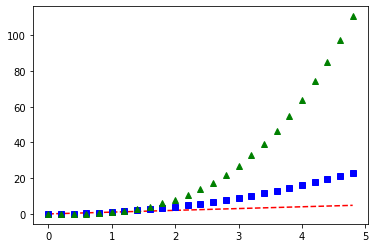

In [36]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### Plotting with keyword strings

In [37]:
# There are some instances where you have data in a format that lets you access particular variables with strings. For example, with numpy.recarray or pandas.DataFrame.
# Matplotlib allows you provide such an object with the data keyword argument. If provided, then you may generate 
#plots with the strings corresponding to these variables.

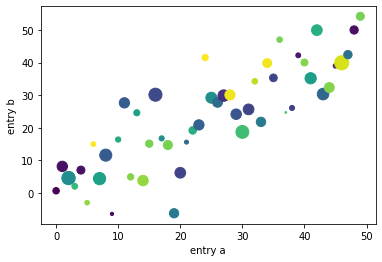

In [41]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

### Plotting with categorical variables

In [42]:
# It is also possible to create a plot using categorical variables. Matplotlib allows 
#you to pass categorical variables directly to many plotting functions
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

In [43]:
values

[1, 10, 100]

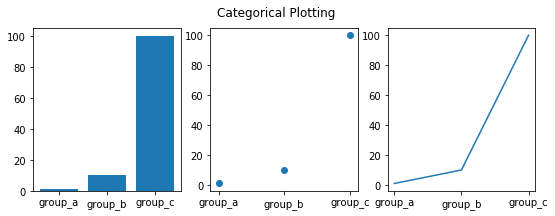

In [50]:
plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

### Controlling line properties

In [52]:
# Lines have many attributes that you can set: linewidth, dash style, antialiased, etc; see matplotlib.lines.Line2D. There are several ways to set line properties
# Use keyword args:
plt.plot(x, y, linewidth=2.0)

In [53]:
# Use the setter methods of a Line2D instance. plot returns a list of Line2D objects; 
#e.g., line1, line2 = plot(x1, y1, x2, y2). 
# In the code below we will suppose that we have only one line so that the list returned is of length 1. 
#We use tuple unpacking with line, to get the first element of that list:

In [ ]:
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialiasing

In [54]:
# Use the setp() command. The example below uses a MATLAB-style command to set multiple properties on a list 
#of lines. setp works transparently with a list of objects or a single object. You can either use python keyword 
#arguments or MATLAB-style string/value pairs:

In [ ]:
lines = plt.plot(x1, y1, x2, y2)
# use keyword args
plt.setp(lines, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  color or c: color
  contains: callable
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor or mfc: color
  markerfacecoloralt or mfcalt: color
  markersize or ms: float
  m

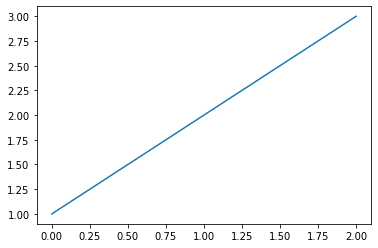

In [56]:
# To get a list of settable line properties, call the setp() function with a line or lines as argument
lines = plt.plot([1, 2, 3])
plt.setp(lines)

### Working with multiple figures and axes

In [2]:
# MATLAB, and pyplot, have the concept of the current figure and the current axes. All plotting commands apply 
#to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance), and gcf() 
#returns the current figure (matplotlib.figure.Figure instance). Normally, you don't have to worry about this, 
#because it is all taken care of behind the scenes. Below is a script to create two subplots.

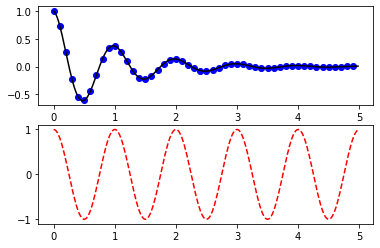

In [3]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()